<a href="https://colab.research.google.com/github/chan-kh/Music-Sentiment-Analysis/blob/main/LSTM_2outputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import os
import datetime
from google.colab import drive

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from pandas import DataFrame

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

from keras import layers
from keras.optimizers import RMSprop
from keras.layers import Bidirectional

from math import sqrt
from scipy.stats.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [11]:
drive.mount("/content/drive")
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sentiment/features_60frames_allsongs.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,song_id,frame_num,zcr,rms,spectral_centroid,spectral_bandwidth,spectral_rolloff,spectral_contrast,spectral_flatness,melspectrogram,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,chroma_stft_0,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,chroma_stft_5,chroma_stft_6,chroma_stft_7,chroma_stft_8,chroma_stft_9,chroma_stft_10,chroma_stft_11,chroma_cqt_0,chroma_cqt_1,chroma_cqt_2,chroma_cqt_3,chroma_cqt_4,chroma_cqt_5,chroma_cqt_6,chroma_cqt_7,chroma_cqt_8,chroma_cqt_9,chroma_cqt_10,chroma_cqt_11,chroma_cens_0,chroma_cens_1,chroma_cens_2,chroma_cens_3,chroma_cens_4,chroma_cens_5,chroma_cens_6,chroma_cens_7,chroma_cens_8,chroma_cens_9,chroma_cens_10,chroma_cens_11,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,valence,arousal
0,2,0,0.157715,0.000011,5604.262879,3246.069688,9549.975586,18.349374,0.283305,0.000000,-636.134705,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.654255,0.699066,0.261531,0.874848,1.000000,0.333313,0.812421,0.488101,0.413135,0.640419,0.671442,0.490904,0.725918,0.250459,0.284098,0.647150,0.349017,0.147453,0.501239,0.074669,0.070883,0.633342,0.184297,0.136420,0.700169,0.030602,0.209675,0.828279,0.124886,0.257948,1.000000,0.071105,0.309559,0.798000,0.076693,0.276441,-0.134078,0.072852,-0.134683,0.086125,0.060471,0.042898,-0.073341,-0.109386
1,2,1,0.051758,0.096817,1443.667160,2057.611806,3036.181641,27.017306,0.003931,1.576688,-120.319748,129.464996,-4.253306,22.214062,8.163963,16.415987,15.152133,7.878392,-6.823561,-0.831550,-7.218902,-4.558928,-1.807601,12.948887,-9.162554,-3.758020,-5.506585,-1.227700,-4.439484,1.684063,0.528904,0.624552,0.263783,0.891966,0.850903,0.331133,1.000000,1.000000,0.408033,0.713866,0.681263,0.480444,0.245905,0.378263,0.278916,0.160639,0.397115,0.147040,0.285743,0.536704,0.072041,0.314144,0.652729,0.144099,0.269362,0.637670,0.218737,0.382769,0.677961,0.263132,0.424450,0.649488,0.317883,0.517798,0.579528,0.282752,-0.088692,0.052331,-0.112961,0.075804,0.041915,0.033029,-0.074661,-0.114942
2,2,2,0.101562,0.096426,2348.097128,2387.006355,4941.870117,22.434103,0.013857,0.152583,-107.915352,76.319107,-14.175928,45.124214,1.209538,7.516734,-5.023264,6.480774,-0.513962,8.108901,-0.198636,-3.022716,2.078595,4.819644,-16.200150,-3.348299,-5.746615,-9.680576,-17.688511,-5.846364,0.190785,0.290683,0.265836,0.206553,0.217986,0.329024,0.491271,0.576434,0.402986,1.000000,0.924618,0.469653,0.706139,0.605435,0.273279,0.307669,0.224213,0.146400,0.107266,0.206321,0.073380,0.222554,0.297425,0.151825,0.408395,0.409732,0.227828,0.563377,0.734764,0.268284,0.755202,1.000000,0.326054,0.528056,0.687259,0.288720,-0.034494,0.031843,-0.070020,0.068549,0.021691,0.023202,-0.074077,-0.116413
3,2,3,0.062500,0.086847,1692.187106,1872.280637,3219.213867,21.295763,0.004178,0.224268,-148.255432,121.565720,-36.703545,33.151939,4.518500,5.197342,-8.610166,4.267920,8.706326,-17.273952,-11.429454,4.515498,-7.324573,4.467141,-13.720921,-3.195490,-3.931114,-7.317858,-15.654930,-15.824336,0.245845,0.300974,0.267710,0.523842,0.578168,0.326966,1.000000,0.842026,0.397746,0.846539,1.000000,0.458391,0.477668,0.673670,0.267148,0.095004,0.189054,0.145584,0.031817,0.101448,0.075003,0.024125,0.114284,0.159790,0.044276,0.137589,0.237066,0.215029,0.300263,0.273559,0.177739,0.341496,0.334054,0.110806,0.207098,0.294537,-0.013095,0.020309,-0.055259,0.034349,0.011610,0.012032,-0.078154,-0.118613
4,2,4,0.120605,0.113167,2632.895857,2453.043616,5329.467773,18.914987,0.025196,1.035493,-71.919838,76.267471,-28.003765,15.988888,4.667567,35.548042,-6.664427,-5.128408,9.827440,-1.635414,-5.240368,-1.569069,-1.458279,7.581460,-16.175152,-6.295955,-9.435411,-3.781498,-8.782184,-7.635081,0.223808,0.355715,0.269517,0.202841,0.376315,0.324933,0.624933,0.684395,0.392219,1.000000,1.000000,0.446547,0.319092,0.

In [12]:
df =df.iloc[np.random.permutation(np.arange(104640).reshape(-1,60)).ravel()]

### With Normalization

In [13]:
# df_train = df[:65880]
# df_val = df[65880:73200]
# df_test = df[73200:104640]

# train_mean = df_train.mean()
# train_std = df_train.std()

# df_train = (df_train - train_mean) / train_std
# df_val = (df_val - train_mean) / train_std
# df_test = (df_test - train_mean) / train_std

In [14]:
# df_std = (df - train_mean) / train_std
# df_std = df_std.melt(var_name='Column', value_name='Normalized')
# plt.figure(figsize=(12, 6))
# ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
# _ = ax.set_xticklabels(df.keys(), rotation=90)

In [15]:
# #With Normalization
# y = df.loc[:,'valence':'arousal']
# df_train.pop('song_id')
# df_train.pop('frame_num')
# df_train.pop('valence')
# df_train.pop('arousal')

# df_val.pop('song_id')
# df_val.pop('frame_num')
# df_val.pop('valence')
# df_val.pop('arousal')

# df_test.pop('song_id')
# df_test.pop('frame_num')
# df_test.pop('valence')
# df_test.pop('arousal')


In [16]:
# train_X = df_train
# train_X = train_X.to_numpy() 

# val_X = df_val
# val_X = val_X.to_numpy() 

# test_X = df_test
# test_X = test_X.to_numpy()

# train_y = y[:65880]
# train_y = train_y.to_numpy()

# val_y = y[65880:73200]
# val_y = val_y.to_numpy()

# test_y = y[73200:104640]
# test_y = test_y.to_numpy()

In [17]:
# #With Normalization
# train_X = train_X.reshape(1098,60,70)
# train_y = train_y.reshape(1098,60,2)
# val_X = val_X.reshape(122,60,70)
# val_y = val_y.reshape(122,60,2)
# test_X = test_X.reshape(524,60,70)
# test_y = test_y.reshape(524,60,2)

### Without Normalization

In [18]:
# Without Normalization
df.pop('song_id')
df.pop('frame_num')
y = df.loc[:,'valence':'arousal']
print(y.shape)
y.head()
df.pop('valence')
df.pop('arousal')
features = df.to_numpy()
y = y.to_numpy()
print(features.shape)
print(y.shape)

(104640, 2)
(104640, 70)
(104640, 2)


In [19]:
# Without Normalization
features = features.reshape(1744,60,70)
y = y.reshape(1744,60,2)
train_X , train_y = features[0:1098] , y[0:1098]
val_X, val_y = features[1098:1220] , y[1098:1220]
test_X , test_y = features[1220:1744] , y[1220:1744]
print("train_X :" , train_X.shape , "train_y shape:" , train_y.shape)
print("test_X :" , test_X.shape , "test_y shape:" , test_y.shape)
print("val_X :" , val_X.shape , "val_y shape:" , val_y.shape)

train_X : (1098, 60, 70) train_y shape: (1098, 60, 2)
test_X : (524, 60, 70) test_y shape: (524, 60, 2)
val_X : (122, 60, 70) val_y shape: (122, 60, 2)


### Experiment

In [20]:
train_loss = DataFrame()
val_loss = DataFrame()
train_accuracy = DataFrame()
val_accuracy = DataFrame()
# model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
for i in range(5):
  model = Sequential()
  model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
  model.add(Dropout(0.3))
  model.add(Bidirectional(LSTM(64,return_sequences=True, input_shape=(60,70))))
  model.add(Dropout(0.3))
  model.add(Bidirectional(LSTM(32,return_sequences=True, input_shape=(60,70))))
  model.add(Dropout(0.3))
  model.add(Dense(2))
  model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
  history = model.fit(train_X, train_y, epochs=400, validation_data=(val_X, val_y), verbose=2, shuffle=False)
  train_loss[str(i)] = history.history['loss']
  val_loss[str(i)] = history.history['val_loss']
  train_accuracy[str(i)] = history.history['accuracy']
  val_accuracy[str(i)] = history.history['val_accuracy']
  

# model.add(Bidirectional(LSTM(64,return_sequences=True, input_shape=(60,70))))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(32,return_sequences=True, input_shape=(60,70))))
# model.add(Bidirectional(LSTM(16,return_sequences=True, input_shape=(60,70))))
# model.add(Bidirectional(LSTM(8,return_sequences=True, input_shape=(60,70))))






Epoch 1/400
35/35 - 3s - loss: 0.0743 - accuracy: 0.5708 - val_loss: 0.0443 - val_accuracy: 0.6478
Epoch 2/400
35/35 - 1s - loss: 0.0520 - accuracy: 0.6016 - val_loss: 0.0401 - val_accuracy: 0.6413
Epoch 3/400
35/35 - 1s - loss: 0.0488 - accuracy: 0.6087 - val_loss: 0.0403 - val_accuracy: 0.6284
Epoch 4/400
35/35 - 1s - loss: 0.0457 - accuracy: 0.6221 - val_loss: 0.0396 - val_accuracy: 0.6477
Epoch 5/400
35/35 - 1s - loss: 0.0457 - accuracy: 0.6249 - val_loss: 0.0385 - val_accuracy: 0.6520
Epoch 6/400
35/35 - 1s - loss: 0.0445 - accuracy: 0.6338 - val_loss: 0.0383 - val_accuracy: 0.6507
Epoch 7/400
35/35 - 1s - loss: 0.0428 - accuracy: 0.6402 - val_loss: 0.0374 - val_accuracy: 0.6400
Epoch 8/400
35/35 - 1s - loss: 0.0427 - accuracy: 0.6376 - val_loss: 0.0384 - val_accuracy: 0.6545
Epoch 9/400
35/35 - 1s - loss: 0.0430 - accuracy: 0.6352 - val_loss: 0.0385 - val_accuracy: 0.6254
Epoch 10/400
35/35 - 1s - loss: 0.0404 - accuracy: 0.6460 - val_loss: 0.0381 - val_accuracy: 0.6474
Epoch 11/

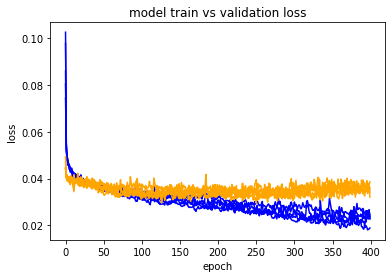

In [21]:
# plot train and validation loss across multiple runs
plt.plot(train_loss, color='blue', label='train')
plt.plot(val_loss, color='orange', label='validation')
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

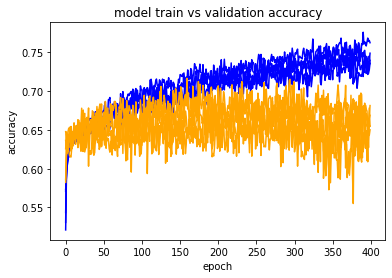

In [22]:
plt.plot(train_accuracy, color='blue', label='train')
plt.plot(val_accuracy, color='orange', label='validation')
plt.title('model train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [23]:
# history = model.fit(train_X, train_y, epochs=300, validation_data=(val_X, val_y), verbose=2, shuffle=False)


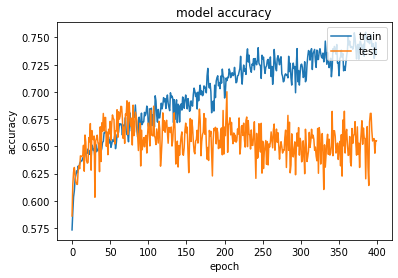

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

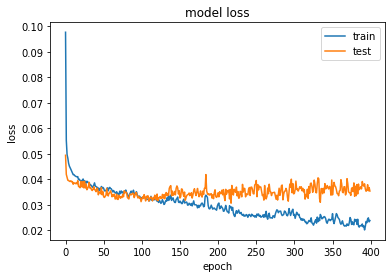

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper right')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [26]:
history.history
print('overall loss' , np.mean(history.history['loss']))
print('overall val_loss' , np.mean(history.history['val_loss']))

overall loss 0.02983658954501152
overall val_loss 0.03519460365176201


In [27]:
predicted_y = model.predict(test_X)


In [28]:
print(predicted_y.shape)
print(test_y.shape)

(524, 60, 2)
(524, 60, 2)


In [29]:
predicted_valence = predicted_y[:,:,0]
predicted_arousal = predicted_y[:,:,1]
test_valence = test_y[:,:,0]
test_arousal = test_y[:,:,1]

In [30]:
# for i in range(1):
  # print(predicted_valence[i])
  # print(predicted_arousal[i])
  # print(test_valence[i])
  # print(test_arousal[i])

In [31]:
predicted_valence = predicted_valence.reshape(31440,)
test_valence = test_valence.reshape(31440,)
predicted_arousal = predicted_arousal.reshape(31440,)
test_arousal = test_arousal.reshape(31440,)

In [32]:
def metrics(y_true,y_pred,name):
  print(name,"")
  mae = mean_absolute_error(y_true,y_pred)
  rmse = sqrt(mean_squared_error(y_true,y_pred))
  r2 = r2_score(y_true,y_pred)
  pearson_corr = pearsonr(y_true,y_pred)
  spearman_corr = spearmanr(y_true,y_pred)
  
  print('RMSE : ',rmse)
  print('Pearson : ',pearson_corr)
  print('MAE : ',mae)
  print('R2 : ',r2)
  print('Spearman : ',spearman_corr,'\n')


In [33]:
def graph_results(x,y,title, xlim=-1, ylim=-1):
  #x and y are variables ( y_pred vs y_true )
  #Important
  plt.scatter(x,y,s=15)

  # if xlim != -1: plt.xlim([0, xlim])
  # if ylim != -1: plt.ylim([0, ylim])
  # plt.gca().set_ylim([1.5,7.5])
  # plt.gca().set_xlim([1.5,9])
  #Fix 
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.title((title))
  # m, b = np.polyfit(x, y, 1)
  # plt.plot(x, m*x + b, color='red')  
  plt.savefig(title)

  plt.show()

valence 
RMSE :  0.22116749642237138
Pearson :  (0.41836289933152637, 0.0)
MAE :  0.17547515297863822
R2 :  0.14183211664727613
Spearman :  SpearmanrResult(correlation=0.4209688505485354, pvalue=0.0) 



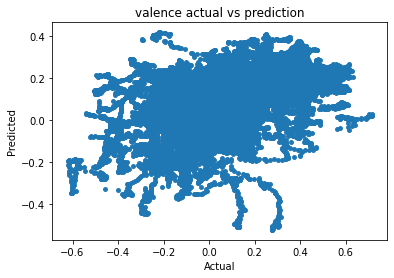

In [34]:
metrics(test_valence,predicted_valence,'valence')
graph_results(test_valence,predicted_valence,'valence actual vs prediction')


arousal 
RMSE :  0.19017462958118445
Pearson :  (0.7790023556770405, 0.0)
MAE :  0.14449829937926745
R2 :  0.5818298794792884
Spearman :  SpearmanrResult(correlation=0.7900939844461735, pvalue=0.0) 



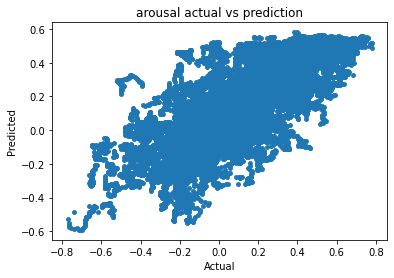

In [35]:
metrics(test_arousal,predicted_arousal,'arousal')
graph_results(test_arousal,predicted_arousal,'arousal actual vs prediction')